# Project: Wrangling and Analyze Data

## Date Gathering

In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
import json
import requests
import Tkeys
import matplotlib.pyplot as plt
%matplotlibe inline
import os

UsageError: Line magic function `%matplotlibe` not found.


#### 1. Data from Twitter:

In [ ]:
#authenticate
auth = tw.OAuthHandler(Tkeys.consumer_key, Tkeys.consumer_secret)
auth.set_access_token(Tkeys.access_token, Tkeys.access_secret)
api = tw.API(auth, wait_on_rate_limit = True)

In [ ]:
#gather the data
search_words ='@dog_rates'
query = tw.Cursor(api.search_tweets, q=search_words).items(1000)
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print (tweets)

In [ ]:
#load the data
tweets

In [ ]:
#convert to a dataframe
df_Tweets = pd.DataFrame(tweets)
df_Tweets

In [ ]:
#export to csv file to acess offline
df_Tweets.to_csv(r'C:\Users\User\Desktop\Panda\Udacity\Project 2\tweets.csv', index = False)

In [96]:
#load df
df_Tweets_original = pd.read_csv("tweets.csv")

#### 2. Tweet image predictions

In [97]:
#fetch data from web
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url,stream = True )
response

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D64F1EBB08>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [7]:
#save to file as "image-predictions.tsv"
with open ("image-predictions.tsv", mode = 'wb') as file:
    file.write (response.content) 

In [99]:
#read the .csv file and assign to a df
image_prediction_original = pd.read_csv("image-predictions.tsv", sep = ';')


In [100]:
image_prediction_original

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
...,...
2070,891327558926688256\thttps://pbs.twimg.com/medi...
2071,891689557279858688\thttps://pbs.twimg.com/medi...
2072,891815181378084864\thttps://pbs.twimg.com/medi...
2073,892177421306343426\thttps://pbs.twimg.com/medi...


#### 3. WeRateDogs Twitter archive data

In [101]:
#read data and assign to a df
twitter_archive_enhanced_original = pd.read_csv("twitter-archive-enhanced.csv")

## Assessment 

#### Eight quality issues and Two (2) tidiness issues 






##### View all the DFs

In [102]:
#Tweeter df

df_Tweets_original

,Tweets,Timestamp
0,RT @dog_rates: This is Eva. She saved her huma...,2022-07-05 12:54:18+00:00
1,RT @dog_rates: This is Kona. He just discovere...,2022-07-05 12:52:06+00:00
2,Employee of the month club. Benny adds a great...,2022-07-05 12:40:59+00:00
3,@dog_rates ja kad slušam nekoga duže od minut,2022-07-05 12:38:34+00:00
4,RT @dog_rates: This is Benny. He fell asleep d...,2022-07-05 12:37:48+00:00
...,...,...
995,RT @dog_rates: The Dogs of 2021 https://t.co/a...,2022-07-03 11:19:55+00:00
996,RT @pete_piccolo: @APBF_dog @pitbullsad @sarao...,2022-07-03 11:07:54+00:00
997,RT @PolachekRachael: @TriBeagles @dog_rates I'...,2022-07-03 11:00:24+00:00
998,RT @TriBeagles: We love pup-dates from our alu...,2022-07-03 11:00:21+00:00


In [200]:
df_Tweets_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweets     1000 non-null   object
 1   Timestamp  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [201]:
df_Tweets_original.sample(10)

,Tweets,Timestamp
983,@TriBeagles @dog_rates Aww so sweet 😋,2022-07-03 12:13:46+00:00
595,RT @dog_rates: This is Benny. He fell asleep d...,2022-07-04 02:53:03+00:00
901,RT @dog_rates: Oh to be a happy little dog hav...,2022-07-03 15:30:36+00:00
561,@partiallypro @dog_feelings @dog_rates You mus...,2022-07-04 03:57:17+00:00
721,RT @dog_rates: This is Potato. He wants to kno...,2022-07-04 01:13:23+00:00
813,RT @dog_rates: This is Benny. He fell asleep d...,2022-07-03 20:47:40+00:00
620,RT @dog_rates: This is Frank. He just got his ...,2022-07-04 02:39:08+00:00
51,@scottgraham89 @dog_rates 🫶🏼🫶🏼,2022-07-05 06:49:22+00:00
928,RT @dog_rates: We only rate dogs. This is clea...,2022-07-03 14:17:06+00:00
39,RT @dog_rates: This is Charlie. He's addicted ...,2022-07-05 09:09:27+00:00


In [202]:
df_Tweets_original.describe()

,Tweets,Timestamp
count,1000,1000
unique,533,995
top,RT @dog_rates: This is Benny. He fell asleep d...,2022-07-04 01:47:15+00:00
freq,179,2


In [203]:
df_Tweets_original[df_Tweets_original.duplicated()]

,Tweets,Timestamp


In [204]:
#image_prediction df
image_prediction_original

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
...,...
2070,891327558926688256\thttps://pbs.twimg.com/medi...
2071,891689557279858688\thttps://pbs.twimg.com/medi...
2072,891815181378084864\thttps://pbs.twimg.com/medi...
2073,892177421306343426\thttps://pbs.twimg.com/medi...


In [205]:
image_prediction_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 1 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog  2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [206]:
image_prediction_original.describe()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
count,2075
unique,2075
top,666020888022790149\thttps://pbs.twimg.com/medi...
freq,1


In [207]:
image_prediction_original.sample()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
1617,802323869084381190\thttps://pbs.twimg.com/medi...


In [208]:
#twitter_archive_enhanced DF
twitter_archive_enhanced_original

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [209]:
twitter_archive_enhanced_original.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [210]:
twitter_archive_enhanced_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [211]:
twitter_archive_enhanced_original.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [212]:
twitter_archive_enhanced_original.rating_numerator.max()

1776

In [213]:
twitter_archive_enhanced_original.rating_denominator.max()

170

In [214]:
twitter_archive_enhanced_original.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
1256,710588934686908417,NaN,NaN,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,12,10,Beemo,None,None,None,None
1715,680221482581123072,NaN,NaN,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,None,None,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None


 
### Tidiness Issues:

###### Twitter_archive_enhanced
1. Information about one type of observational unit is spread across 3 different files
2. Dogstages in different columns.


### Quality issues

###### Tweets Table
1. "+00:00" in Timestamp columns.
 
###### Twitter_archive_enhanced
2. Column names are not in order.
3. Entries with incorrect names ('None', 'such', 'a', 'not', 'one', 'mad', 'an', 'very', 'my', 'his', 'actually', 'his', 'getting', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'light', 'space').
4. Absurd Rating rating_numerator 	
5. Rating_denominator above and below 10
6. 'href=' in the source column.
8. Missing Dog names.
9. Missing expanded_urls.
10. Retweets are not needed in the dataset and should be removed.
11. Empty retweet table after removing retweets should be removed too.
12. Ratings with decimal values incorrectly extracted

## Cleaning


### Tidiness Issues:
###### Twitter_archive_enhanced
1. Merge Dogstages into one column.
2. Merge all the Datasets


### Quality issues

###### Tweets Table
1. Remove "+00:00" in Timestamp columns.
 
###### Twitter_archive_enhanced
2. Edit Column names.
3. Remove tweets with incorrect names ('None', 'such', 'a', 'not', 'one', 'mad', 'an', 'very', 'my', 'his', 'actually', 'his', 'getting', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'light', 'space').
4. Adjust Absurd Rating rating_numerator 	
5. Change Rating_denominator above and below 10 to 10
6. Remove 'href=' in the source column.
7. Adjust Ratings with decimal values incorrectly extracted
8. Remove all Retweets 
9. Remove Retweet table


In [215]:
#duplicate the DFs
tweets = df_Tweets_original.copy()


In [216]:
archive = twitter_archive_enhanced_original.copy()


In [217]:
iprediction = image_prediction_original.copy()


In [218]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [219]:
archive = archive[archive.retweeted_status_id.isnull()]


###### Resolve Quality Issues

#### Define
### Quality issues

###### Tweets Table
1. Remove "+00:00" in Timestamp columns.
 
###### Twitter_archive_enhanced
2. Edit Column names.
3. Replace Dogs with incorrect names ('None', 'such', 'a', 'not', 'one', 'mad', 'an', 'very', 'my', 'his', 'actually', 'his', 'getting', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'light', 'space') with "Nil" .
4. Change Rating_denominator above 10 to 10
5. Remove 'href=' in the source column.
6. Adjust ratings with decimal values incorrectly extracted
7. Remove all Retweets 
8. Remove Retweet columns to clear excess null values

### Code

###### Issue 1

In [221]:
#Remove "+00:00" in Timestamp columns
tweets["Timestamp"] = tweets["Timestamp"].str[:19]
archive["timestamp"] = archive["timestamp"].str[:19]

###### Issue 2

In [222]:
#edit the column names
archive.rename(columns={"tweet_id":"Tweet ID", "in_reply_to_status_id" : "In reply to status ID",
                                       "in_reply_to_user_id" : "In reply to user ID", "timestamp" : "Timestamp", 
                                         "source" : "Source", "text" : "Text", "retweeted_status_id" : "Retweeted status ID",
                                        "retweeted_status_user_id" : "Retweeted status user ID", "retweeted_status_timestamp" : "Retweeted status timestamp",
                                       "expanded_urls" : "Expanded urls", "rating_numerator" : "Rating numerator", "rating_denominator" : "Rating denominator",
                                        "name":"Name"}, inplace = True)

###### Issue 3

In [223]:
#replace wrong names with "Nil"

archive.Name.replace(('None', 'such', 'a', 'not', 'one', 'mad', 'an', 'very', 'my', 'his', 'actually', 'his', 'getting', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'light', 'space', 'quite', 'this', 'life', 'just', "incredibly"), 'No Name', inplace = True)

###### Issue 4

In [224]:
#fix rating numerator
archive["Rating denominator"] = "10"

###### Issue 5

In [225]:
#Remove 'href=' in the source column.
archive["Source"] = archive["Source"].str[9:]

###### Issue 6

In [226]:
#Adust ratings with decimal values incorrectly extracted

In [227]:
ratings = archive["Text"].astype('str').str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)
archive["Rating numerator"] = ratings[0]

##### Issue 7

In [228]:
archive = archive[archive ['Retweeted status ID'].isnull()]
archive.drop(["Retweeted status ID", "Retweeted status user ID", "Retweeted status timestamp"], axis = 1, inplace = True)

  ### Test
  

###### Issue 1

In [229]:
tweets.head(2)

,Tweets,Timestamp
0,RT @dog_rates: This is Eva. She saved her huma...,2022-07-05 12:54:18
1,RT @dog_rates: This is Kona. He just discovere...,2022-07-05 12:52:06


###### Issue 2, 5, 6

In [230]:
archive.head(2)

,Tweet ID,In reply to status ID,In reply to user ID,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


###### Issue 3

In [231]:
archive.Name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No Name',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hob

###### Issue 4

In [232]:
archive["Rating denominator"].max()

'10'

##### Issue 7

In [233]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet ID               2175 non-null   int64  
 1   In reply to status ID  78 non-null     float64
 2   In reply to user ID    78 non-null     float64
 3   Timestamp              2175 non-null   object 
 4   Source                 2175 non-null   object 
 5   Text                   2175 non-null   object 
 6   Expanded urls          2117 non-null   object 
 7   Rating numerator       2175 non-null   object 
 8   Rating denominator     2175 non-null   object 
 9   Name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 254.9+

#### Define 

### Tidiness Issues:

###### Twitter_archive_enhanced
1. Merge all Dogstages into one column.
2. Merge all the datasets

#### Code

##### Issue 1

In [234]:
#separate Date and timestamps into different columns
Dates = tweets["Timestamp"].str[:10]
Time = tweets["Timestamp"].str[10:]
tweets.drop("Timestamp", axis=1, inplace = True)
tweets = tweets.assign(Dates = Dates, Time = Time)

In [235]:
archive.doggo.replace("None", "", inplace = True)
archive.floofer.replace("None", "", inplace = True)
archive.pupper.replace("None", "", inplace = True)
archive.puppo.replace("None", "", inplace = True)

In [239]:
archive.head(1)

,Tweet ID,In reply to status ID,In reply to user ID,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


In [237]:
#Neatly mearge all Dog Stages into one column
archive['Dog Stage'] = archive.loc[:,['pupper','puppo','doggo','floofer']].apply(lambda x:''.join(x.values.astype(str)),axis=1)
archive.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [238]:
archive[archive["Dog Stage"] == 'doggofloofer'] ="doggo, floofer"
archive[archive["Dog Stage"] == 'pupperdoggo'] ="pupper, doggo"
archive[archive["Dog Stage"] == 'puppodoggo'] ="puppo, doggo"

##### Issue 2

In [241]:
archive_tweets = archive.join(tweets)

twitter_archive_master =archive_tweets.join(iprediction)

#### Test

In [242]:
tweets.head(2)

,Tweets,Dates,Time
0,RT @dog_rates: This is Eva. She saved her huma...,2022-07-05,12:54:18
1,RT @dog_rates: This is Kona. He just discovere...,2022-07-05,12:52:06


In [243]:
archive.head(2)

,Tweet ID,In reply to status ID,In reply to user ID,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [244]:
twitter_archive_master.head(3)

,Tweet ID,In reply to status ID,In reply to user ID,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage,Tweets,Dates,Time,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,RT @dog_rates: This is Eva. She saved her huma...,2022-07-05,12:54:18,666020888022790149\thttps://pbs.twimg.com/medi...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,RT @dog_rates: This is Kona. He just discovere...,2022-07-05,12:52:06,666029285002620928\thttps://pbs.twimg.com/medi...
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,Employee of the month club. Benny adds a great...,2022-07-05,12:40:59,666033412701032449\thttps://pbs.twimg.com/medi...


### Storing Data

In [245]:
twitter_archive_master.to_csv (r'C:\Users\User\Desktop\Panda\Udacity\Project 2\twitter_archive_master.csv', index = False)

In [246]:
archive.to_csv(r'C:\Users\User\Desktop\Panda\Udacity\Project 2\archive_master.csv', index = False)

In [247]:
tweets.to_csv(r'C:\Users\User\Desktop\Panda\Udacity\Project 2\tweets_master.csv', index = False)

In [248]:
iprediction.to_csv(r'C:\Users\User\Desktop\Panda\Udacity\Project 2\predictions_master.csv', index = False)

## Analysis and Visualizing Data

Dogs with highest rating in 2017, 2016 and 2015

To achieve this, I created another column "Years" which contained the different years the dogs were rated and assigned it to a new DF.

In [288]:
Years = archive["Timestamp"].str[ :4]
new_archive = archive.assign(Year = Years)

new_archive.head(3)

,Tweet ID,In reply to status ID,In reply to user ID,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage,Year
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,2017


In [250]:
new_archive.groupby('Year')['Rating numerator',"Name", "Tweet ID" ].max()

C:\Users\User\anaconda3\envs\ALX3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rating numerator,Name,Tweet ID
Year,,,
2015,9.5,Zuzu,682697186228989953
2016,99,Zoe,814986499976527872
2017,960,Zooey,892420643555336193
dogg,"doggo, floofer","doggo, floofer","doggo, floofer"
pupp,"puppo, doggo","puppo, doggo","puppo, doggo"


Dogs with lowest rating in 2017, 2016 and 2015

In [251]:
new_archive.groupby('Year')['Rating numerator',"Name", "Tweet ID" ].min()

C:\Users\User\anaconda3\envs\ALX3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rating numerator,Name,Tweet ID
Year,,,
2015,1,Acro,666020888022790149
2016,0,Abby,682750546109968385
2017,0,Aja,815390420867969024
dogg,"doggo, floofer","doggo, floofer","doggo, floofer"
pupp,"pupper, doggo","pupper, doggo","pupper, doggo"


Most Popular Names

In [252]:
#Most popular name in the Dataset
most_pop_names = new_archive["Name"].value_counts()
most_pop_names

No Name          776
Lucy              11
Charlie           11
pupper, doggo     10
Oliver            10
                ... 
Sephie             1
Bonaparte          1
Wishes             1
Rose               1
Christoper         1
Name: Name, Length: 931, dtype: int64

### Visualization

In [289]:
years = new_archive['Year']

My visualization is a histogram of the Number of Tweets per year.

<AxesSubplot:>

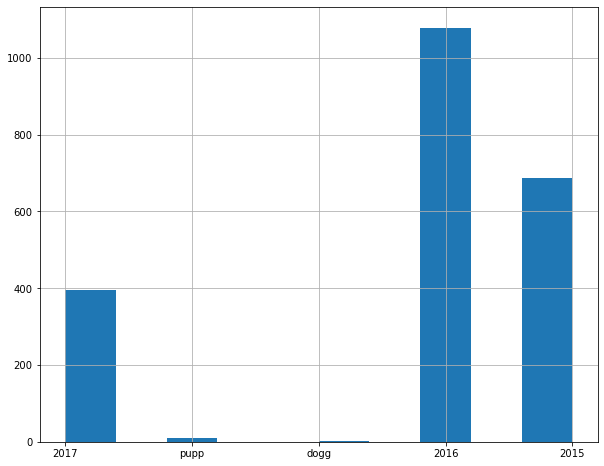

In [282]:
years.hist(figsize=(10,8))

## 